# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("orders.csv")
AOV = df["order_value"].mean()
print(AOV)

3145.128


Text(0.5, 1.0, 'Scatterplot of Individual Order Values')

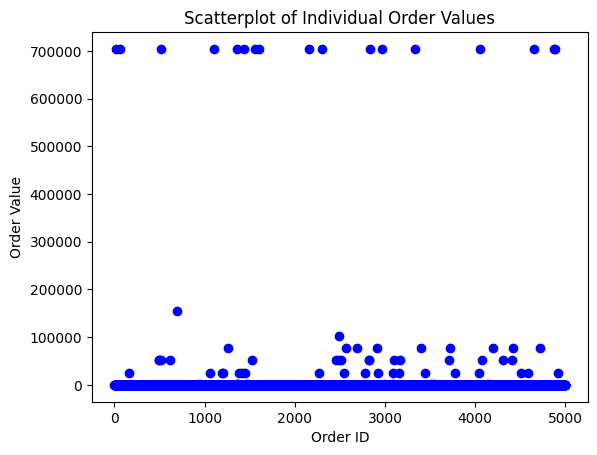

In [14]:
plt.scatter(df['order_id'], df['order_value'], color = "blue")
plt.xlabel("Order ID")
plt.ylabel("Order Value")
plt.title("Scatterplot of Individual Order Values")

In [ ]:
'''
When one looks at the data analysis, computing the AOV from the data provided yields an obscenely high score, dividing the TOV by the
number of orders does in fact yield an AOV of 3145.13, which is also depicted on the scatterplot above. There is an issue with the order
values in the input file, with some orders being over 70 thousand dollars. This heavily skews the data, giving an inaccurate measure of
the true population mean.
'''

In [73]:
df["order_value"].median()

284.0

In [ ]:
'''
Because of the skew and significant outliers present in this dataset, the median would be a much better metric to use for this
analysis, as it is more resistant to skewed data. The median value of the order values is 284 dollars, a much more realistic figure than the 
3145.13 generated by the mean.
'''

In [142]:
years = {}
months = {}
days = {}
hours = {}
minutes = {}
seconds = {}

for id in range(len(df)):
    date_time = (df.loc[id]["created_at"]).split()
    date = date_time[0]
    time = date_time[1]

    years[id] = int(date[:4])
    months[id] = int(date[5:7])
    days[id] = int(date[8:10])
    
    if time[2] == ':':
        hours[id] = int(time[:2])
        minutes[id] = int(time[3:5])
        seconds[id] = int(time[6:8])
    else:
        hours[id] = int(time[:1])
        minutes[id] = int(time[2:4])
        seconds[id] = int(time[5:7])

df["year"] = years
df["month"] = months
df["day"] = days
df["hour"] = hours
df["minute"] = minutes
df["second"] = seconds

Text(0.5, 1.0, 'Order Value ($) at Different Hours of Day')

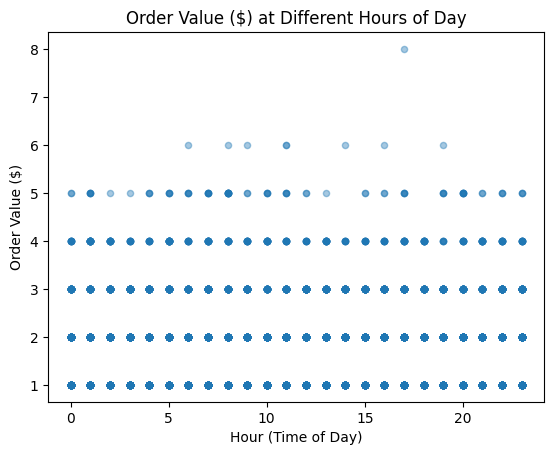

In [162]:
df = df[df.order_value < 10000]

df.plot.scatter(x='hour', y='total_items', alpha=0.4)
plt.xlabel('Hour (Time of Day)')
plt.ylabel('Order Value ($)')
plt.title('Order Value ($) at Different Hours of Day')

Text(0.5, 1.0, 'Order Value ($) at Different Hours of Day')

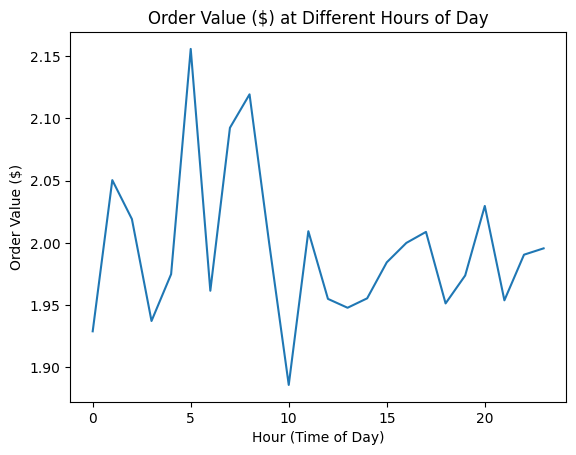

In [161]:
df.groupby('hour')["total_items"].mean().plot()
plt.ylabel('Order Value ($)')
plt.xlabel('Hour (Time of Day)')
plt.title('Order Value ($) at Different Hours of Day')

In [ ]:
'''
I split up the created_at strings into nested lists of integers representing the year, day, month, hour, minute and second. Then, I 
made a scatterplot and a line graph, showing how the amount of items placed in an order fluctuated at different hours of the day. For this to 
be readable, I had to ignore the outliers at the very top, so that a pattern could be revealed. Overall, I found that the most expensive 
orders are placed between the hours of 5 and 9 am, while the least expensive are at 10 am. This tells me that customers are more likely
to purchase sneakers in the morning then in the afternoon.
'''